kara listeye düşmek için gerekli olan şartları inceledim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, shapiro, levene, f_oneway, bartlett
import seaborn as sns
from scipy import stats
import pylab as pl
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("hmelq.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [4]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
data.tail()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN
3575,1,5900,NaN,28000.0,DebtCon,Self,1.0,2.0,1.0,36.77,1.0,8.0,NaN


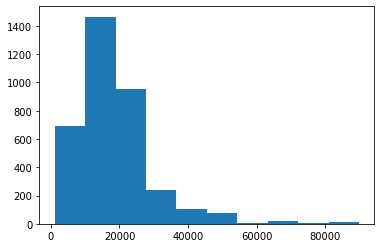

In [6]:
plt.hist(data.loan)
plt.show()

C:\Users\eadem\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eadem\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


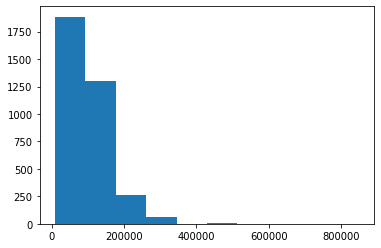

In [7]:
plt.hist(data.value)
plt.show()

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


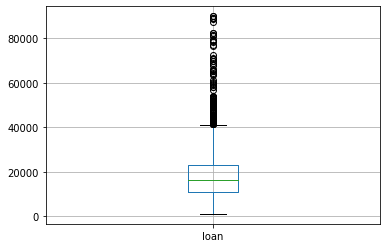

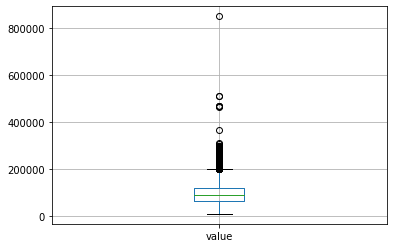

In [9]:
data.boxplot("loan")
plt.show()
data.boxplot("value")
plt.show()

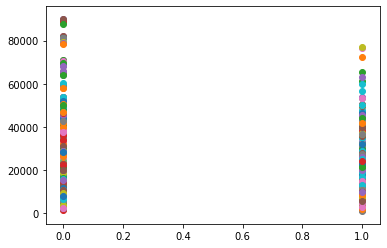

In [10]:
fig, ax = plt.subplots()
for i in range (len(data['bad'])):
    ax.scatter(data['bad'][i],data['loan'][i])
plt.show()

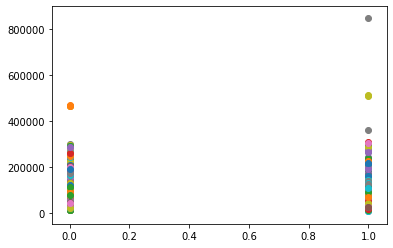

In [11]:
fig, ax = plt.subplots()
for i in range (len(data['bad'])):
    ax.scatter(data['bad'][i],data['value'][i])
plt.show()

In [53]:
dataVar = pd.crosstab(index = data.loan/data.value, columns = data.bad)
dataVar

bad,0,1
row_0,,
0.015179,1,0
0.015504,0,1
0.019006,0,1
0.019016,1,0
0.020241,1,0
0.021442,0,1
0.022883,1,0
0.024026,1,0
0.025045,0,1


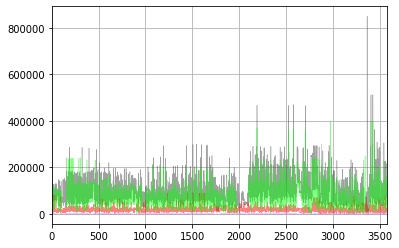

In [22]:
data.value.plot(color = '#424244',label = 'value',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
data.loan.plot(color = '#ff0000',label = 'loan',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
data.mortdue.plot(color = '#00ff00',label = 'mortdue',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
data.bad.plot(color = '#0000ff',label = 'bad',linewidth=.5, alpha = 0.5,grid = True,linestyle = 'dotted')
data.derog.plot(color = '#ff00ff',label = 'derog',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
plt.show()

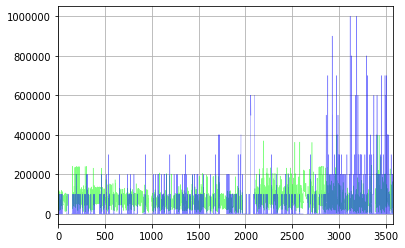

In [59]:
derog = data.derog*100000
data.mortdue.plot(color = '#00ff00',label = 'mortdue',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
derog.plot(color = '#0000ff',label = 'derog',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
plt.show()

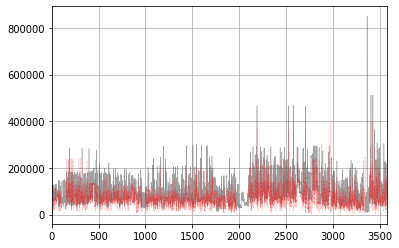

In [23]:
data.value.plot(color = '#424244',label = 'value',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
data.mortdue.plot(color = '#ff0000',label = 'mortdue',linewidth=.5, alpha = 0.5,grid = True,linestyle = ':')

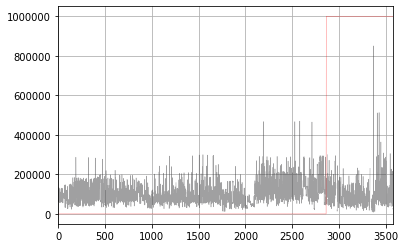

In [37]:
bad = data.bad*1000000
data.value.plot(color = '#424244',label = 'value',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
bad.plot(color = '#ff0000',label = 'bad',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
plt.show()

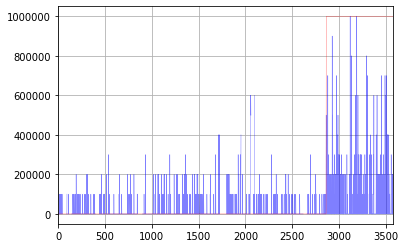

In [60]:
derog.plot(color = '#0000ff',label = 'derog',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
bad.plot(color = '#ff0000',label = 'bad',linewidth=.5, alpha = 0.5,grid = True,linestyle = '-')
plt.show()

bad değerinin 1 çıkmasının derog ile ilgili olduğunu gözlemledim. sonucu etkileyen tek gözlem değil ama yüksek bir etkiye sahip.

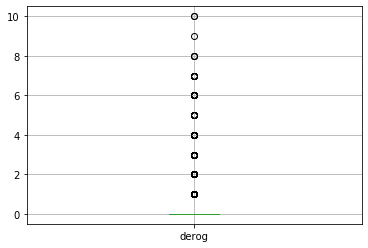

In [42]:
data.boxplot("derog")
plt.show()

In [75]:
results = smf.ols("mortdue ~ (value)", data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mortdue   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Sat, 07 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:59:27   Log-Likelihood:                -36575.
No. Observations:                3213   AIC:                         7.315e+04
Df Residuals:                    3211   BIC:                         7.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -603.4401    824.612     -0.732      0.464   -2220.260    1013.379
value          0.7120      0.007    101.566      0.000       0.698       0.726
==============================================================================
Omnibus:                     2041.210   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170737.079
Skew:                           2.198   Prob(JB):                         0.00
Kurtosis:                      38.440   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
shapiro(data.mortdue[:100])

(0.9676433801651001, 0.014634022489190102)

In [113]:
levene(data.bad, data.mortdue[:100])

LeveneResult(statistic=6824.190803930893, pvalue=0.0)